# Full Model Visualizations Notebook

# Setup

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from utils import read_data, K
from tqdm import tqdm
import seaborn as sns
from utils import read_data
from data_processing import *
from bias_model import *
import seaborn as sns
from hw5_model import *

In [147]:
# CONSTANTS
TEN_MOVIES = ["x1", "y"]
TEN_POPULAR = ["x2", "y"]
TEN_BEST = ["x3", "y"]
GENRE_LABELS = {
  "Children": ["x4", "y"],
  "Horror": ["x5", "y"],
  "Sci-Fi": ["x6", "y"],
}

In [148]:
DATA_PATH = 'data/data.csv'
MOVIES_PATH = 'data/movies.csv'
data = pd.read_csv(DATA_PATH, sep=',')
movies = pd.read_csv(MOVIES_PATH, sep=',')
movies['Year'] = movies['Movie Title'].str[-5:].str[:4].astype('int') 

In [149]:
# Need to pick some 10 movies of our choosing (these are all bangers that I highly recommend :) )
my_favorite_films = ["Shrek (2001)", 
                     "Shrek 2 (2004)", 
                     "Shrek Forever After (a.k.a. Shrek: The Final Chapter) (2010)",
                     "Shrek the Third (2007)",
                     "Puss in Boots (2011)",
                     "South Park: Imaginationland (2008)",
                     "Social Network, The (2010)", 
                     "Star Wars: Episode II - Attack of the Clones (2002)", 
                     "Star Wars: Episode III - Revenge of the Sith (2005)",
                     "Star Trek (2009)"]
my_favorite_film_IDs = []

for film in my_favorite_films:
    my_favorite_film_IDs.append(movies['Movie ID'][movies["Movie Title"] == film].to_numpy()[0])
    

In [150]:
# Need to get the 10 most popular movies
my_popular_films = []
my_popular_film_IDs = get_top_ten_most_popular_movie_ids()

for id in my_popular_film_IDs:
    my_popular_films.append(movies['Movie Title'][movies["Movie ID"] == id].to_numpy()[0])
    

In [151]:
# Need to get the 10 best movies
my_best_films = []
my_best_film_IDs = data.groupby(by='Movie ID').mean().sort_values('Rating', ascending=False)[:10].index.values

for id in my_best_film_IDs:
    my_best_films.append(movies['Movie Title'][movies["Movie ID"] == id].to_numpy()[0])
    

In [152]:
#We need to choose some genres
def getGenre(genre, yes=1):
    return movies.loc[movies[genre]==yes]["Movie ID"].to_numpy(), movies.loc[movies[genre]==yes]["Movie Title"].to_numpy()
genres = ["Children", "Horror", "Sci-Fi"]    


In [153]:
def plotFromList(approx_V,IDs,titles, xlabel='x', ylabel='y'):
    to_viz_np = []
    for i in IDs:
        to_viz_np.append(approx_V[:,i])
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = [xlabel, ylabel])

    to_viz_df['titles'] = titles
    fig = px.scatter(to_viz_df, x=xlabel, y=ylabel, text='titles', template='plotly_dark')
    fig.update_traces(textposition='bottom center')

    return fig

# def plotFromList(approx_V,IDs,titles, xlabel='x', ylabel='y'):
#     to_viz_np = []
#     for i in IDs:
#         to_viz_np.append(approx_V[:,i])
#     to_viz_np = np.array(to_viz_np)
#     to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
#     ax = sns.scatterplot(to_viz_df, x='x', y='y')
#     for i, (x, y) in to_viz_df.iterrows():
#         ax.text(x+.01, y-.01, str(titles[i]))
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     return ax

In [154]:
def plotFavoriteFilms(approx_V):
    return plotFromList(approx_V, my_favorite_film_IDs, my_favorite_films, TEN_MOVIES[0], TEN_MOVIES[1])

In [155]:
def plotPopularFilms(approx_V):
    return plotFromList(approx_V, my_popular_film_IDs, my_popular_films, TEN_POPULAR[0], TEN_POPULAR[1])

In [156]:
def plotBestFilms(approx_V):
    return plotFromList(approx_V, my_best_film_IDs, my_best_films, TEN_BEST[0], TEN_BEST[1])

In [157]:
def plotGenre(approx_V, genre):
    GIDs, GTitles = getGenre(genre)
    GIDs = GIDs[:10]
    GTitles = GTitles[:10]
    return plotFromList(approx_V, GIDs, GTitles, GENRE_LABELS[genre][0], GENRE_LABELS[genre][1])

In [228]:
# For interesting visualization we want to look at how films evolve over time
def getYearRange(start, end):
    movies['Year'] = movies['Movie Title'].str[-5:].str[:4].astype('int') 
    before = movies.loc[movies['Year'] < end] 
    return before.loc[before['Year']>=start]["Movie ID"].to_numpy(), before.loc[before['Year']>=start]["Movie Title"].to_numpy()


In [229]:
def plotTime(approx_V):
    years = [2000,2005,2010,2015,2020]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    for y in range(len(years)-1):
        to_viz_np = []
        points, titles = getYearRange(years[y], years[y+1])
        for i in points:
            to_viz_np.append(approx_V[:,i])

        to_viz_np = np.array(to_viz_np)
        to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
        ax1.scatter(to_viz_df['x'],to_viz_df['y'], label = "["+str(years[y])+", "+str(years[y+1])+")")
    plt.legend(loc='upper left')

# HW5 Model

In [221]:
U, V = get_U_V(data)
num_users, num_movies = compute_num_users_and_movies(data)
eta = 0.03
reg = 0.1
eps = 0.0001
max_epochs = 300
data_as_numpy = data.to_numpy(copy=True).astype(int)
A, S, B = np.linalg.svd(V)
approx_V = np.dot(A[:, :2].T, V)
approx_U = np.dot(A[:, :2].T, U)

  3%|███▎                                                                                              | 10/300 [00:11<05:26,  1.13s/it]


## 1) 10 Movies of Our Choosing 

In [222]:
plotFavoriteFilms(approx_V)

## 2) 10 Most Popular Movies

In [223]:
plotPopularFilms(approx_V)

## 3) 10 Best Movies

In [217]:
plotBestFilms(approx_V)

## 4) Genres
### a) Childrens

In [218]:
plotGenre(approx_V, genres[0])

### b) Horror

In [219]:
plotGenre(approx_V, genres[1])

### c) Sci-Fi

In [220]:
plotGenre(approx_V, genres[2])

# Bias Model

In [165]:
data, movies = read_data()
U, V, a, b = get_U_V_a_b(data)
num_users, num_movies = compute_num_users_and_movies(data)
eta = 0.03
reg = 0.1
eps = 0.0001
max_epochs = 300
data_as_numpy = data.to_numpy(copy=True).astype(int)
A, S, B = np.linalg.svd(V)
approx_V = np.dot(A[:, :2].T, V)
approx_U = np.dot(A[:, :2].T, U)

## 1) 10 Movies of Our Choosing 

In [166]:
plotFavoriteFilms(approx_V)

## 2) 10 Most Popular Movies

In [167]:
plotPopularFilms(approx_V)

## 3) 10 Best Movies

In [168]:
plotBestFilms(approx_V)

## 4) Genres
### a) Childrens

In [169]:
plotGenre(approx_V, genres[0])

### b) Horror

In [170]:
plotGenre(approx_V, genres[1])

### c) Sci-Fi

In [171]:
plotGenre(approx_V, genres[2])

# Suprise Model

In [205]:
from surprise_nmf import get_U_V
from surprise import NMF

data, movies = read_data()
model = NMF()
U, V = get_U_V(NMF, data)
A, S, B = np.linalg.svd(V)
approx_V = np.dot(A[:, :2].T, V)
approx_U = np.dot(A[:, :2].T, U)

## 1) 10 Movies of Our Choosing 

In [204]:
plotFavoriteFilms(approx_V)

## 2) 10 Most Popular Movies

In [202]:
plotPopularFilms(approx_V)

## 3) 10 Best Movies

In [209]:
plotBestFilms(approx_V)

## 4) Genres
### a) Childrens

In [208]:
plotGenre(approx_V, genres[0])

### b) Horror

In [206]:
plotGenre(approx_V, genres[1])

### c) Sci-Fi

In [207]:
plotGenre(approx_V, genres[2])

# Interesting Visualization 

## 1) HW5 Model

  6%|█████▌                                                                                            | 17/300 [00:18<05:13,  1.11s/it]


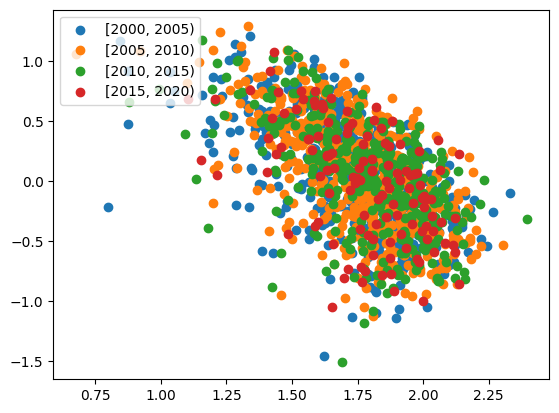

In [230]:
from hw5_model import *
U, V = get_U_V(data)
num_users, num_movies = compute_num_users_and_movies(data)
eta = 0.03
reg = 0.1
eps = 0.0001
max_epochs = 300
data_as_numpy = data.to_numpy(copy=True).astype(int)
A, S, B = np.linalg.svd(V)
approx_V = np.dot(A[:, :2].T, V)
approx_U = np.dot(A[:, :2].T, U)
plotTime(approx_V)

## 2) Bias Model

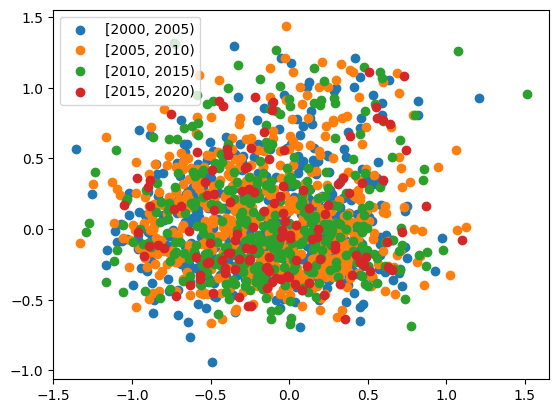

In [231]:
data, movies = read_data()
U, V, a, b = get_U_V_a_b(data)
num_users, num_movies = compute_num_users_and_movies(data)
eta = 0.03
reg = 0.1
eps = 0.0001
max_epochs = 300
data_as_numpy = data.to_numpy(copy=True).astype(int)
A, S, B = np.linalg.svd(V)
approx_V = np.dot(A[:, :2].T, V)
approx_U = np.dot(A[:, :2].T, U)
plotTime(approx_V)

## 3) Suprise

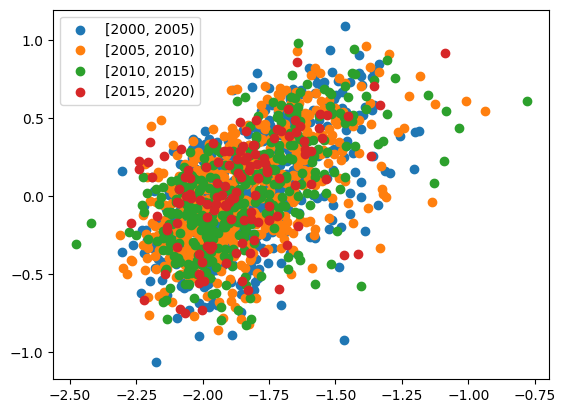

In [232]:
from surprise_nmf import get_U_V
from surprise import NMF

data, movies = read_data()
model = NMF()
U, V = get_U_V(NMF, data)
A, S, B = np.linalg.svd(V)
approx_V = np.dot(A[:, :2].T, V)
approx_U = np.dot(A[:, :2].T, U)
plotTime(approx_V)